In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

Using master branch of `visual_behavior_analysis`:
    
    https://github.com/AllenInstitute/visual_behavior_analysis

In [3]:
import visual_behavior.data_access.loading as loading

### get data cache using `from_s3_cache` method

Use cache directory on the network containing NWB files saved from AWS 

In [4]:
cache_dir = loading.get_platform_analysis_cache_dir()
print(cache_dir)

//allen/programs/braintv/workgroups/nc-ophys/visual_behavior/platform_paper_cache


In [5]:
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)

### get experiments table for learning mFISH pilot experiments

`ophys_experiment_table` contains a record of each unique 2P field of view recorded in each session. 
One `ophys_session_id` can have 8 imaging planes, corresonding to 8 `ophys_experiment_ids`. 
A given imaging plane that is recorded across multiple sessions is linked by its `ophys_container_id`. 

In [6]:
experiments_table = cache.get_ophys_experiment_table()

# should only include data from project codes associated with visual behavior data release
experiments_table.project_code.unique()

array(['VisualBehaviorMultiscope', 'VisualBehaviorTask1B',
       'VisualBehavior', 'VisualBehaviorMultiscope4areasx2d'],
      dtype=object)

In [9]:
print(len(experiments_table.mouse_id.unique()))

107


### get behavior sessions for some mouse

In [11]:
behavior_sessions = cache.get_behavior_session_table()

In [26]:
mouse_id = experiments_table.mouse_id.unique()[50]
            
# look at training history for this mouse
mouse_beh_data = behavior_sessions[behavior_sessions.mouse_id==mouse_id].sort_values(by='date_of_acquisition')
mouse_beh_data[['mouse_id', 'session_type', 'ophys_experiment_id']]

,mouse_id,session_type,ophys_experiment_id
behavior_session_id,,,
827312851,438912,TRAINING_0_gratings_autorewards_15min,NaN
828646634,438912,TRAINING_1_gratings,NaN
829128279,438912,TRAINING_1_gratings,NaN
829591790,438912,TRAINING_1_gratings,NaN
830201482,438912,TRAINING_1_gratings,NaN
830867799,438912,TRAINING_1_gratings,NaN
831834820,438912,TRAINING_1_gratings,NaN
832325815,438912,TRAINING_2_gratings_flashed,NaN
832990071,438912,TRAINING_2_gratings_flashed,NaN


### get ophys_containers for this mouse 

In [27]:
mouse_data = experiments_table[experiments_table.mouse_id==mouse_id].sort_values(by='date_of_acquisition')
ophys_container_ids = mouse_data.ophys_container_id.unique()
len(ophys_container_ids)

6

### pick a container and experiment

In [28]:
ophys_container_id = ophys_container_ids[0]
experiment_id = experiments_table[experiments_table.ophys_container_id==ophys_container_id].index.values[0]
experiment_id

847267624

### load ophys dataset for this experiment

In [29]:
dataset = cache.get_behavior_ophys_experiment(experiment_id)

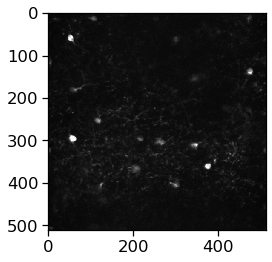

In [30]:
plt.imshow(dataset.max_projection, cmap='gray')

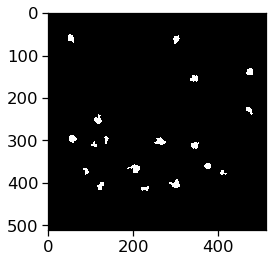

In [31]:
plt.imshow(dataset.segmentation_mask_image, cmap='gray')

In [32]:
dataset.dff_traces

,cell_roi_id,dff
cell_specimen_id,,
1086512261,1080854740,"[19.712932586669922, 17.267105102539062, 16.28..."
1086512470,1080854747,"[0.9266295433044434, 1.1095601320266724, 1.500..."
1086517629,1080854764,"[6.427168369293213, 6.252079963684082, 7.32800..."
1086512613,1080854787,"[3.692857027053833, 4.920130252838135, 2.92668..."
1086512699,1080854813,"[3.9970669746398926, 2.5939831733703613, 2.423..."
1086516047,1080854856,"[0.4880005419254303, 0.5942140221595764, 0.141..."
1086513015,1080854860,"[5.67019510269165, 2.952738046646118, 1.693332..."
1086516106,1080854864,"[1.7547324895858765, 3.012686014175415, 2.1593..."
1086513277,1080854869,"[2.9231276512145996, 1.0498965978622437, 1.450..."


### plot max projections for this container using `visual_behavior_analysis` plotting functions 

Note: this only works for Visual Behavior released data if you are on the `master` branch of `visual_behavior_analysis`

In [33]:
import visual_behavior.visualization.qc.container_plots as cp

In [ ]:
cp.plot_sdk_max_projection_images_for_container(ophys_container_id, save_figure=False)

getting experiment table for March and August releases from lims


C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes

excluding Ai94 data
getting experiment table for March and August releases from lims


C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes

excluding Ai94 data


In [ ]:
cp.plot_trials_population_average_across_sessions(ophys_container_id, save_figure=True)

In [ ]:
cp.plot_running_speed_for_container(ophys_container_id, save_figure=True)